In [ ]:
# dont go down a rabit hole!!!! --> PS
# subject matter knowledge --> PS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
# plt.style.use('dark_background')
plt.style.use('ggplot')

In [10]:
# census = pd.read_csv('./Unmerged Data/Census_Data_2010.csv', encoding='latin-1')
grad_rates = pd.read_csv('./Unmerged Data/Graduation_Rates.csv', encoding='latin-1')
# tract_overlap = pd.read_csv('./Unmerged Data/Max_Tract_Overlap.csv', encoding='latin-1')
# sd_tract = pd.read_csv('./Unmerged Data/SD_TRACT_MAPPING2010.csv', encoding='latin-1')


crime = pd.read_csv('./Unmerged Data/Other Data/CrimeOneYearofData.csv', encoding='latin-1')
pre_merged = pd.read_csv('./Unmerged Data/Pre_Merged_Data.csv', encoding='latin-1')

In [3]:
pre_merged.head()

,Unnamed: 0,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1,100005,ALABAMA,1,Albertville City,268,83.0,NaN,NaN,NaN,...,100.0,0.0,63.14,2.48,0.0,10.39,87.13,55.74,7.40,0.0
1,2,100006,ALABAMA,1,Marshall County,424,79.0,2.0,PS,1.0,...,100.0,0.0,63.27,3.52,0.0,17.02,79.45,56.31,6.96,0.0
2,3,100007,ALABAMA,1,Hoover City,1042,91.0,1.0,PS,71.0,...,100.0,0.0,81.77,1.97,0.0,2.98,95.06,81.77,0.00,0.0
3,4,100008,ALABAMA,1,Madison City,836,91.0,4.0,PS,44.0,...,100.0,0.0,67.06,4.38,0.0,6.99,88.63,58.64,8.42,0.0
4,5,100011,ALABAMA,1,Leeds City,117,72.0,NaN,NaN,NaN,...,100.0,0.0,60.84,3.82,0.0,17.87,78.31,53.11,7.73,0.0


In [13]:
# df_names = [census, grad_rates, tract_overlap, sd_tract, crime, pre_merged]
df_names = [pre_merged, grad_rates, crime]
for i in df_names:
    i.rename(columns= {col: col.lower() for col in i.columns}, inplace=True)

In [ ]:
# grad_rates = pd.read_csv('./Unmerged Data/Graduation_Rates.csv', encoding='latin-1')
# df_names = [grad_rates]
# for i in df_names:
#     i.rename(columns= {col: col.lower() for col in i.columns}, inplace=True)

In [ ]:
# does the indian school have a casino
# make it a classification problem ... use kmean to group them or knn


### Grad_Rates

In [8]:
grad_rates[grad_rates['all_rate_1112'].str.contains('[A-z-]')].all_rate_1112.value_counts().sort_index()
# Greater than or equal to = ≥ = GE
#  Less than or equal to = ≤ = LE
#  Greater than = > = GT
#  Less than = < = LT
#  Data suppressed to protect student privacy = PS

# PS == take average of the schools in the state or figure corr based on population

10-14       8
11-19      10
15-19      12
20-24      16
20-29      22
21-39      32
25-29      17
30-34      15
30-39      23
35-39      13
40-44      18
40-49      27
40-59      53
45-49      25
50-54      20
50-59      48
55-59      41
6-9        17
60-64      63
60-69      70
60-79     127
65-69     114
70-74     176
70-79     179
75-79     298
80-84     526
80-89     467
85-89     739
90-94    1039
GE50      572
GE80      861
GE90      963
GE95      742
GE99       48
LE1         3
LE10       12
LE20       39
LE5        19
LT50       61
PS        197
Name: all_rate_1112, dtype: int64

In [ ]:
def rate_cleaner(i):
    try:
        left , right = i.split('-')
        return round((int(left)+int(right))/2)
        
    except:
        if pd.isnull(i):
            return 'none'
        
        if i[0] == 'L':
            return round(int(i[2:])/2)
            
        if i[0] == 'G':
            return round((int(i[2:]) + 100) / 2)

        if i == 'PS':
            return 'PS'
        
        if i.isnumeric():
            return int(i)

In [ ]:
# clean all rate columns

list_columns = [i for i in grad_rates.columns if 'rate' in i]
for i in list_columns:
    grad_rates[i] = grad_rates[i].apply(rate_cleaner)

In [ ]:
def all_rate_PS_removal(i):
    if i == 'PS':
        return np.nan
    else:
        return i

grad_rates['all_rate_1112'] = grad_rates['all_rate_1112'].apply(all_rate_PS_removal)

In [ ]:
grad_rates.info()

# Keep this shit as learning

In [ ]:
# PS feature eng --> take the average of all PS values for that state
# dict of state to average value --> group by state then whatever we want to grab
# if rate = ps uses state as index to look up dict and replace -> lambda x: dict[x.stnam] if x.rate = ps else x.rate
# can only do for all rates column

In [ ]:
grad_rates.head(2)

In [ ]:
grad_rates['all_rate_1112'].isnull().value_counts()

In [ ]:
mean_all_rate_df = grad_rates.loc[grad_rates['all_rate_1112']!='PS',:]
mean_all_rate_df['all_rate_1112'] = mean_all_rate_df['all_rate_1112'].astype(float)
state_rate_avg_dict = dict(mean_all_rate_df.groupby('stnam')['all_rate_1112'].mean())
state_rate_avg_dict

In [ ]:
state_rate_avg_dict['WISCONSIN']

In [ ]:
# take the average and divide by chort size to figure out grad rate per person
# then go and and multiple by the PS chort size

#### Crime

In [11]:
crime.head()

,State,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,Alabama,4785401,18363,275,1355,4864,11869,168828,42484,115564,10780,383.7,5.7,28.3,101.6,248.0,3528.0,887.8,2414.9,225.3
1,Alaska,714146,4537,31,533,594,3379,20259,3105,15535,1619,635.3,4.3,74.6,83.2,473.2,2836.8,434.8,2175.3,226.7
2,Arizona,6413158,26528,408,2191,6953,16976,226802,50932,154137,21733,413.6,6.4,34.2,108.4,264.7,3536.5,794.2,2403.4,338.9
3,Arkansas,2921588,14711,134,1321,2369,10887,103820,32463,65796,5561,503.5,4.6,45.2,81.1,372.6,3553.5,1111.1,2252.1,190.3
4,California,37338198,164133,1809,8331,58116,95877,981939,228857,600558,152524,439.6,4.8,22.3,155.6,256.8,2629.9,612.9,1608.4,408.5


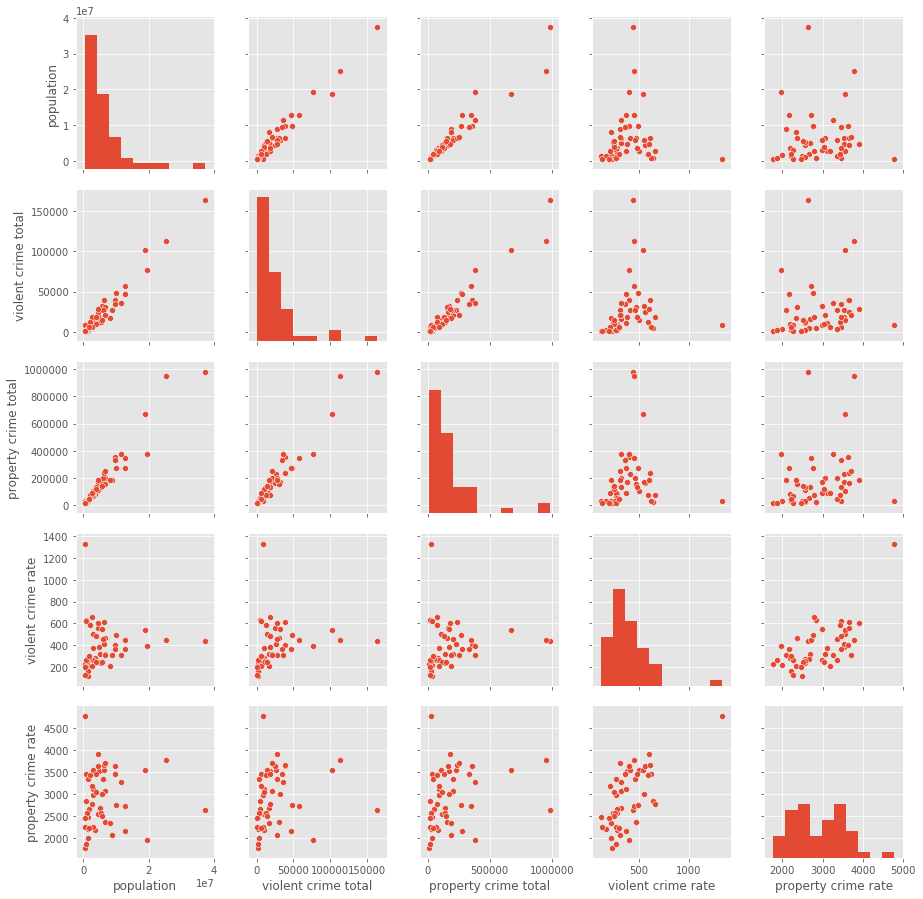

In [14]:
sns.pairplot(crime[['state', 'population', 'violent crime total', 'property crime total', 'violent crime rate', 'property crime rate']])

### Pre_Merged

In [ ]:
pre_merged.columns[7:24]

In [ ]:
pre_merged.info(verbose=True)

In [4]:
def rate_cleaner2(i):
    try:
        left , right = i.split('-')
        return round((int(left)+int(right))/2)
        
    except:
        if pd.isnull(i):
            return np.nan
        
        if i[0] == 'L':
            return round(int(i[2:])/2)
            
        if i[0] == 'G':
            return round((int(i[2:]) + 100) / 2)

        if i == 'PS':
            return np.nan
        
        if i.isnumeric():
            return int(i)

In [5]:
list_columns = [i for i in pre_merged.columns[7:24] if 'rate' in i]
for i in list_columns:
    pre_merged[i] = pre_merged[i].apply(rate_cleaner2)

#### Lasso

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [7]:
# we know the graduation rates so figure out what the most import features are

In [8]:
abs(pre_merged.corr()['all_rate_1112'].sort_values(ascending=False))

all_rate_1112                       1.000000
mwh_rate_1112                       0.809466
ecd_rate_1112                       0.657595
mbl_rate_1112                       0.645466
cwd_rate_1112                       0.643522
mhi_rate_1112                       0.604659
mam_rate_1112                       0.558463
mtr_rate_1112                       0.395234
mas_rate_1112                       0.381827
pct_census_mail_returns_cen_2010    0.334847
pct_frst_frms_cen_2010              0.334425
nh_white_alone_cen_2010             0.309347
nh_white_alone_acs_08_12            0.308692
frst_frms_cen_2010                  0.294008
percentage                          0.293409
college_acs_08_12                   0.290230
pct_tot_occp_units_acs_08_12        0.287769
pct_mailback_count_cen_2010         0.287016
census_mail_returns_cen_2010        0.286169
college_acsmoe_08_12                0.279209
mrdcple_fmly_hhd_acs_08_12          0.275341
mrdcple_fmly_hhd_cen_2010           0.274859
pct_tot_oc

In [9]:
# Ignore this stuff -- it was a failed attempt

# X = pre_merged._get_numeric_data().drop(['all_rate_1112', 'unnamed: 0'], axis=1)
# y = pre_merged['all_rate_1112']
# X.fillna(0, inplace=True)
# y.fillna(0, inplace=True)

In [10]:
# ss = StandardScaler()
# X_ss = ss.fit_transform(X)

# lasso = Lasso()
# lasso.fit(X_ss, y)

In [11]:
# coef_df = pd.DataFrame(abs(lasso.coef_), columns=['coef'])
# coef_df['features'] = pre_merged._get_numeric_data().drop(['all_rate_1112', 'unnamed: 0'], axis=1).columns
# coef_df.sort_values('coef', ascending=False).head(14)

In [12]:
# [i for i in pre_merged.columns if i not in pre_merged._get_numeric_data().columns]

In [13]:
def money_landurer(cell):    
    if pd.isnull(cell):
        return int('0')
    else:
        return int(cell.replace(',' , '').strip('$'))

In [14]:
money_col = ['med_hhd_inc_acs_08_12', 'med_hhd_inc_acsmoe_08_12', 'aggregate_hh_inc_acs_08_12', 'aggregate_hh_inc_acsmoe_08_12', 'med_house_value_acs_08_12',
     'med_house_value_acsmoe_08_12', 'aggr_house_value_acs_08_12', 'aggr_house_value_acsmoe_08_12']
for i in money_col:
    pre_merged[i] = pre_merged[i].apply(money_cleaner)

In [15]:
# check to make sure money cleaner is working
[i for i in pre_merged.columns if i not in pre_merged._get_numeric_data().columns]

['stnam', 'leanm11', 'school.district', 'state_name', 'county_name']

In [16]:
X = pre_merged._get_numeric_data().drop(['all_rate_1112', 'unnamed: 0'], axis=1)
y = pre_merged['all_rate_1112']
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [17]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

lasso = Lasso()
lasso.fit(X_ss, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
coef_df = pd.DataFrame(abs(lasso.coef_), columns=['coef'])
coef_df['features'] = pre_merged._get_numeric_data().drop(['all_rate_1112', 'unnamed: 0'], axis=1).columns
coef_df.sort_values('coef', ascending=False).head(14)

,coef,features
14,7.447456,mwh_rate_1112
18,4.056410,ecd_rate_1112
16,2.099762,cwd_rate_1112
20,0.446531,percentage
266,0.426024,aggregate_hh_inc_acs_08_12
538,0.158891,pct_vacant_units_cen_2010
384,0.000000,pct_age5p_german_acs_08_12
380,0.000000,pct_age5p_italian_acs_08_12
381,0.000000,pct_age5p_italian_acsmoe_08_12
382,0.000000,pct_age5p_portugues_acs_08_12


In [ ]:
lasso.score()

In [19]:
# input and predict based on thoses inputs what would the graduation rate be

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf = RandomForestRegressor(n_estimators=6, max_depth=4)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
rf_features_df = pd.DataFrame()
rf_features_df['importances'] = rf.feature_importances_
rf_features_df['feature'] = X.columns

In [23]:
rf_features_df.sort_values('importances', ascending=False).head(19)

,importances,feature
2,0.603564,all_cohort_1112
14,0.340956,mwh_rate_1112
18,0.047351,ecd_rate_1112
295,0.002695,no_plumb_acs_08_12
3,0.001730,mam_cohort_1112
520,0.000770,pct_sngl_prns_hhd_acs_08_12
432,0.000571,pct_age5p_othasian_acs_08_12
350,0.000447,pct_nh_white_alone_cen_2010
512,0.000408,pct_not_mrdcple_hhd_acsmoe_08_12
15,0.000405,cwd_cohort_1112


### Testing droping rate and cohort

In [24]:
pre_merged.columns[:38]

Index(['unnamed: 0', 'leaid11', 'stnam', 'fipst', 'leanm11', 'all_cohort_1112',
       'all_rate_1112', 'mam_cohort_1112', 'mam_rate_1112', 'mas_cohort_1112',
       'mas_rate_1112', 'mbl_cohort_1112', 'mbl_rate_1112', 'mhi_cohort_1112',
       'mhi_rate_1112', 'mtr_cohort_1112', 'mtr_rate_1112', 'mwh_cohort_1112',
       'mwh_rate_1112', 'cwd_cohort_1112', 'cwd_rate_1112', 'ecd_cohort_1112',
       'ecd_rate_1112', 'lep_cohort_1112', 'percentage', 'state', 'county',
       'tract.code', 'school.district', 'district.id', 'gidtr', 'state.1',
       'state_name', 'county.1', 'county_name', 'tract', 'flag',
       'num_bgs_in_tract'],
      dtype='object')

In [25]:
no_rate_to_drop_col = list(pre_merged._get_numeric_data().columns[:33])

In [26]:
X_no_rates = pre_merged._get_numeric_data().drop(no_rate_to_drop_col, axis=1)
y_no_rates = pre_merged['all_rate_1112']
X_no_rates.fillna(0, inplace=True)
y_no_rates.fillna(0, inplace=True)

In [27]:
rf_no_rate = RandomForestRegressor(n_estimators=6, max_depth=10)
rf_no_rate.fit(X_no_rates, y_no_rates)

rf_no_rate_features_df = pd.DataFrame()
rf_no_rate_features_df['importances'] = rf_no_rate.feature_importances_
rf_no_rate_features_df['feature'] = X_no_rates.columns

In [28]:
rf_no_rate.score(X_no_rates, y_no_rates)

0.565978489992086

In [29]:
rf_no_rate_features_df.sort_values('importances', ascending=False).head(25)

,importances,feature
0,0.271942,land_area
539,0.040052,pct_frst_frms_cen_2010
233,0.018434,med_hhd_inc_acs_08_12
322,0.018022,pct_nh_blk_alone_cen_2010
346,0.013900,pct_age5p_french_acsmoe_08_12
279,0.012950,valid_mailback_count_cen_2010
534,0.011080,pct_census_mail_returns_cen_2010
523,0.010334,pct_mobile_homes_acsmoe_08_12
38,0.010058,nh_white_alone_cen_2010
517,0.009885,pct_single_unit_acsmoe_08_12


In [ ]:
# identify the most relevant and then build a model that is most relavent
# regress out values you cannot control

# corrolation between features that can be changed

In [ ]:
# # TRY

# what is corrolerated to whiteness -- sklearn.preprocessing.PolynomialFeatures

    # pca see what each combined feature is --> singular_values_ 
    # also try truncated svd -- works better for sparse matrix (values are mostly zeros)

In [ ]:
# recommender
# input school district and search for the other values
# they would then imput what they want to change

# model would be based on state

# linear regression -- positive corr if you increase it increases the model
# beta value for teacher salary will be in dollars

# what does it mean to increase by 5%??
#     if all values are percentages
# for teacher salary you could find a mean or max and do a percentage of that (if you do max its a min-max scalar)

# still report how accuratly it is predicting graduation rates

In [ ]:
# # Rename the revenue columns

# rev_renamed          = ['GEOTYPE', 'ST', 'GEO_ID', 'GEO_TTL', 'YEAR', 'enroll', 'total_rev', 'total_fed', 't1_fed',
#                         'special_fed', 'nutrition_fed', 'non_spec_fed', 'total_state', 'gen_formula_state',
#                         'special_state', 'transportation_state', 'non_spec_state', 'total_local', 'taxes_local',
#                         'property_tax_local', 'parent_government_local', 'cities_county_local', 'other_schools_local',
#                         'charges_local', 'other_local']

# expenses_renamed     = ['GEOTYPE', 'ST', 'GEO_ID', 'GEO_TTL', 'YEAR', 'enroll_expnd', 'total_expnd', 'current_expnd', 
#                         'salary_wage_expnd', 'employee_benefits_expnd', 'instruction_total_expnd',
#                         'instruction_salary_wage_expnd', 'instruction_employee_benefits_expnd',
#                         'support_total_expnd', 'pupil_support_expnd', 'instructional_support_expnd',
#                         'services_general_administration_expnd', 'services_school_administration_expnd',
#                         'other_non_spec_expnd', 'functions_other_expnd', 'capital_outlay_expnd',
#                         'intergovernmental_expnd', 'interest_on_debt_expnd']

# distribution_renamed = ['GEOTYPE', 'ST', 'GEO_ID', 'GEO_TTL', 'YEAR', 'enrollment_distribution', 'total_rev_percent',
#                         'total_rev_fed_percent', 't1_rev_fed_percent', 'total_state_percent',
#                         'general_assistance_formula_state_rev_percent', 'total_local_rev',
#                         'taxes_parent_government_local_rev_percent', 'other_local_government_rev_percent',
#                         'charges_local_rev_percent']

# per_pupil_renamed    = ['GEOTYPE', 'ST', 'GEO_ID', 'GEO_TTL', 'YEAR', 'enroll_per_pupil', 'total_expnd_per_pupil',
#                         'objects_salary_wage_per_pupil', 'objects_employee_benefits_per_pupil',
#                         'instruction_total_per_pupil', 'instruction_salary_wages_per_pupil', 
#                         'instruction_employee_benefits_per_pupil', 'suport_services_total_per_pupil', 
#                         'pupil_support_per_pupil', 'instruction_staff_support_per_pupil', 
#                         'services_general_admin_per_pupil', 'services_school_admin_per_pupil']

In [ ]:
# languages make english and enlgish as a second language

In [31]:
import pickle

In [32]:
# pickle.dump(rf_no_rate, 'C:\Users\Mark\GA\Projects\project-3')

In [34]:
with open('C:/Users/Mark/GA/Projects/project-3/foo.pkl', 'wb+') as f:
    pickle.dump(rf_no_rate, f)

In [35]:
with open('C:/Users/Mark/GA/Projects/project-3/foo.pkl', 'rb') as f:
    foo = pickle.load(f)

In [36]:
foo.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

### Google Code Challenge

Solar Doomsday
==============

Who would've guessed? Doomsday devices take a LOT of power. Commander Lambda wants to supplement the LAMBCHOP's quantum antimatter reactor core with solar arrays, and she's tasked you with setting up the solar panels. 

Due to the nature of the space station's outer paneling, all of its solar panels must be squares. Fortunately, you have one very large and flat area of solar material, a pair of industrial-strength scissors, and enough MegaCorp Solar Tape(TM) to piece together any excess panel material into more squares. For example, if you had a total area of 12 square yards of solar material, you would be able to make one 3x3 square panel (with a total area of 9). That would leave 3 square yards, so you can turn those into three 1x1 square solar panels.

Write a function answer(area) that takes as its input a single unit of measure representing the total area of solar panels you have (between 1 and 1000000 inclusive) and returns a list of the areas of the largest squares you could make out of those panels, starting with the largest squares first. So, following the example above, answer(12) would return [9, 1, 1, 1].

Test cases
==========

Inputs:
    (int) area = 12
Output:
    (int list) [9, 1, 1, 1]

Inputs:
    (int) area = 15324
Output:
    (int list) [15129, 169, 25, 1]

Use verify [file] to test your solution and see how it does. When you are finished editing your code, use submit [file] to submit your answer. If your solution passes the test cases, it will be removed from your home folder.

In [ ]:
def answer(area):
    x = area
    answer = []
    while area > 0:
        if x**(.5) == int(x**(.5)):
            answer.append(x)
            area -= x
            x = area
            continue
        x -= 1
    return answer

In [ ]:
answer(12)

In [16]:
pre_merged.shape

(9907, 580)